# Two dataset simulation case study

In [11]:
from glotaran.io import load_scheme, load_parameters
from glotaran.simulation import simulate
import numpy as np
from pyglotaran_extras import plot_data_overview

time_axis = np.arange(-1, 20, 0.01)
spectral_axis = np.arange(600, 700, 1.4)
simulation_coordinates = {"time": time_axis, "spectral": spectral_axis}

## Simulate data

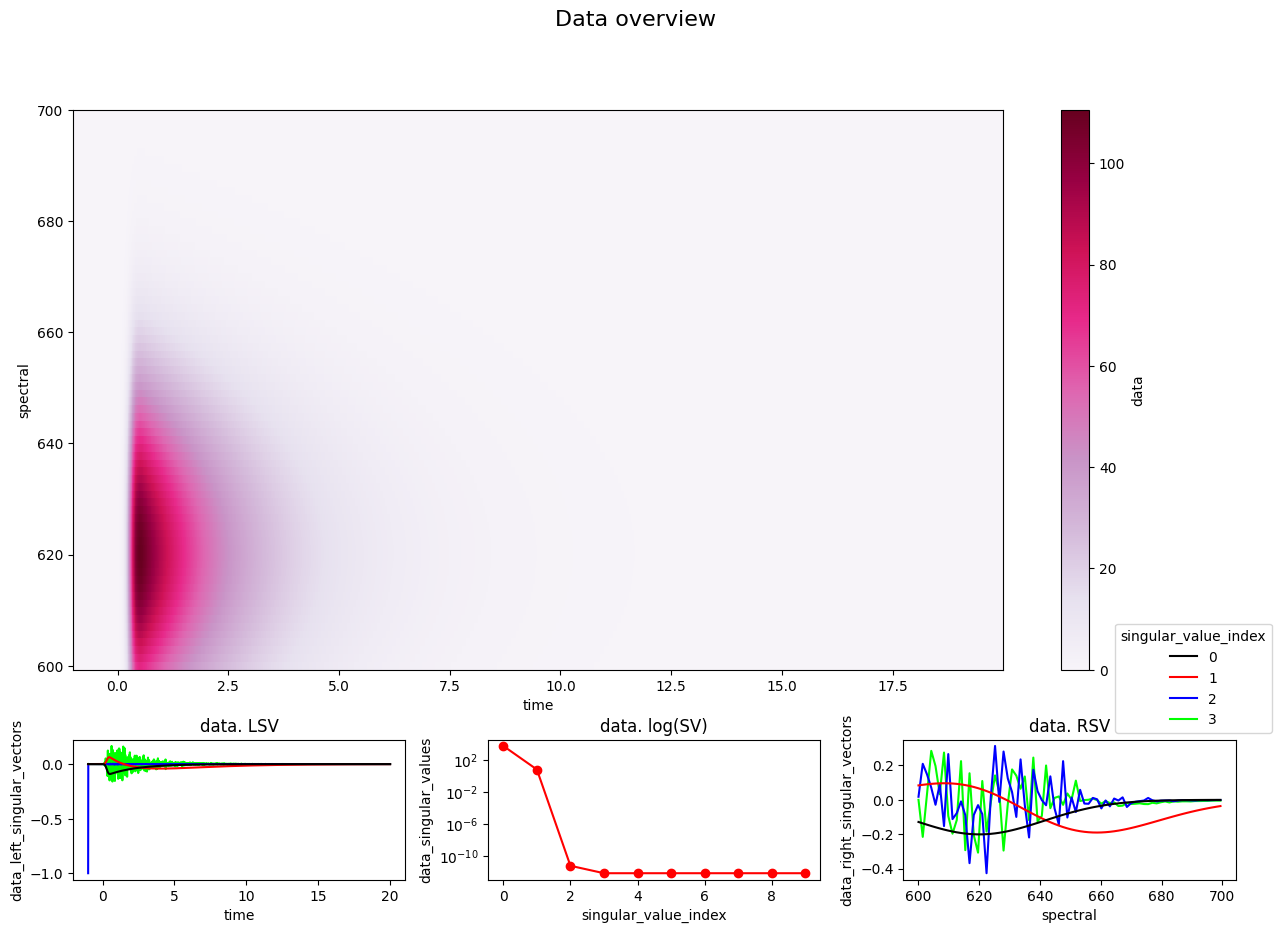

In [12]:
sim_scheme = load_scheme("models/sim-scheme.yaml")

ds1 = simulate(
    model=sim_scheme.experiments["sim"].datasets["dataset_1"],
    library=sim_scheme.library,
    parameters=load_parameters("models/sim-params.yaml"),
    coordinates=simulation_coordinates,
    noise=True,
    noise_std_dev=0.1

)
plot_data_overview(ds1);

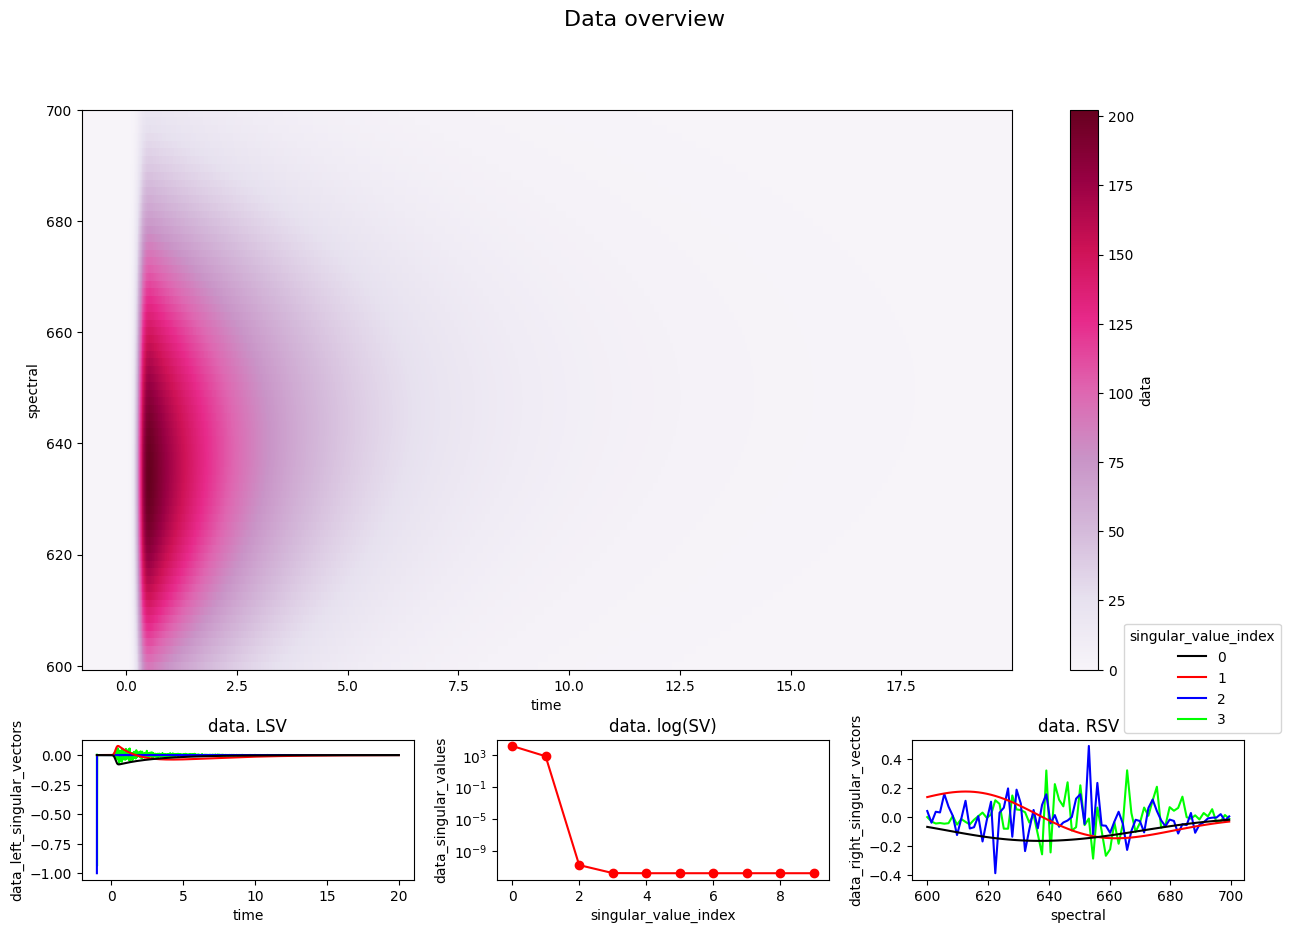

In [13]:
ds2 = simulate(
    model=sim_scheme.experiments["sim"].datasets["dataset_2"],
    library=sim_scheme.library,
    parameters=load_parameters("models/sim-params.yaml"),
    coordinates=simulation_coordinates,
    noise=True,
    noise_std_dev=0.1
)
plot_data_overview(ds2);

In [14]:
ds2.data[0,:]

<xarray.DataArray 'data' (spectral: 72)>
array([6.22317100e-37, 6.67483083e-37, 7.13305199e-37, 7.59514562e-37,
       8.05828379e-37, 8.51953866e-37, 8.97592477e-37, 9.42444314e-37,
       9.86212612e-37, 1.02860819e-36, 1.06935375e-36, 1.10818787e-36,
       1.14486866e-36, 1.17917694e-36, 1.21091880e-36, 1.23992766e-36,
       1.26606555e-36, 1.28922387e-36, 1.30932336e-36, 1.32631350e-36,
       1.34017136e-36, 1.35089986e-36, 1.35852570e-36, 1.36309685e-36,
       1.36467991e-36, 1.36335725e-36, 1.35922421e-36, 1.35238631e-36,
       1.34295666e-36, 1.33105355e-36, 1.31679842e-36, 1.30031408e-36,
       1.28172336e-36, 1.26114806e-36, 1.23870835e-36, 1.21452246e-36,
       1.18870660e-36, 1.16137531e-36, 1.13264178e-36, 1.10261853e-36,
       1.07141796e-36, 1.03915308e-36, 1.00593808e-36, 9.71888839e-37,
       9.37123342e-37, 9.01761857e-37, 8.65926971e-37, 8.29743398e-37,
       7.93337597e-37, 7.56837190e-37, 7.20370207e-37, 6.84064173e-37,
       6.48045088e-37, 6.12436308e-37, 5.77357390e-37, 5.42922920e-37,
       5.09241375e-37, 4.76414049e-37, 4.44534067e-37, 4.13685532e-37,
       3.83942807e-37, 3.55369964e-37, 3.28020400e-37, 3.01936629e-37,
       2.77150254e-37, 2.53682102e-37, 2.31542522e-37, 2.10731825e-37,
       1.91240858e-37, 1.73051683e-37, 1.56138343e-37, 1.40467699e-37])
Coordinates:
    time      float64 -1.0
  * spectral  (spectral) float64 600.0 601.4 602.8 604.2 ... 696.6 698.0 699.4

## Fitting with link_clp true (default)

In [15]:
fit_scheme_clp_false = load_scheme("models/fit-scheme_link_clp_true.yaml")
fit_scheme_clp_false.load_data({"dataset_1": ds1, "dataset_2": ds2})

In [16]:
result = fit_scheme_clp_false.optimize(load_parameters("models/fit-params.yaml"))

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.3448e+07                                    2.25e+08    
       1              2         2.0187e+06      2.14e+07       1.56e+00       3.76e+07    
       2              3         2.1546e+05      1.80e+06       3.13e+00       1.01e+07    
       3              5         2.2471e+04      1.93e+05       1.56e+00       3.47e+06    
       4              6         8.0214e+02      2.17e+04       3.13e+00       3.99e+05    
       5              9         2.3095e+02      5.71e+02       3.37e-02       1.29e+05    
       6             10         1.1194e+02      1.19e+02       6.73e-02       3.52e+05    
       7             11         4.0296e+01      7.16e+01       6.73e-02       1.14e+06    
       8             14         5.3295e+00      3.50e+01       4.21e-03       2.68e+05    
       9             15         1.7078e+00      3.62e+00       8.42e-03       1.41e+05    

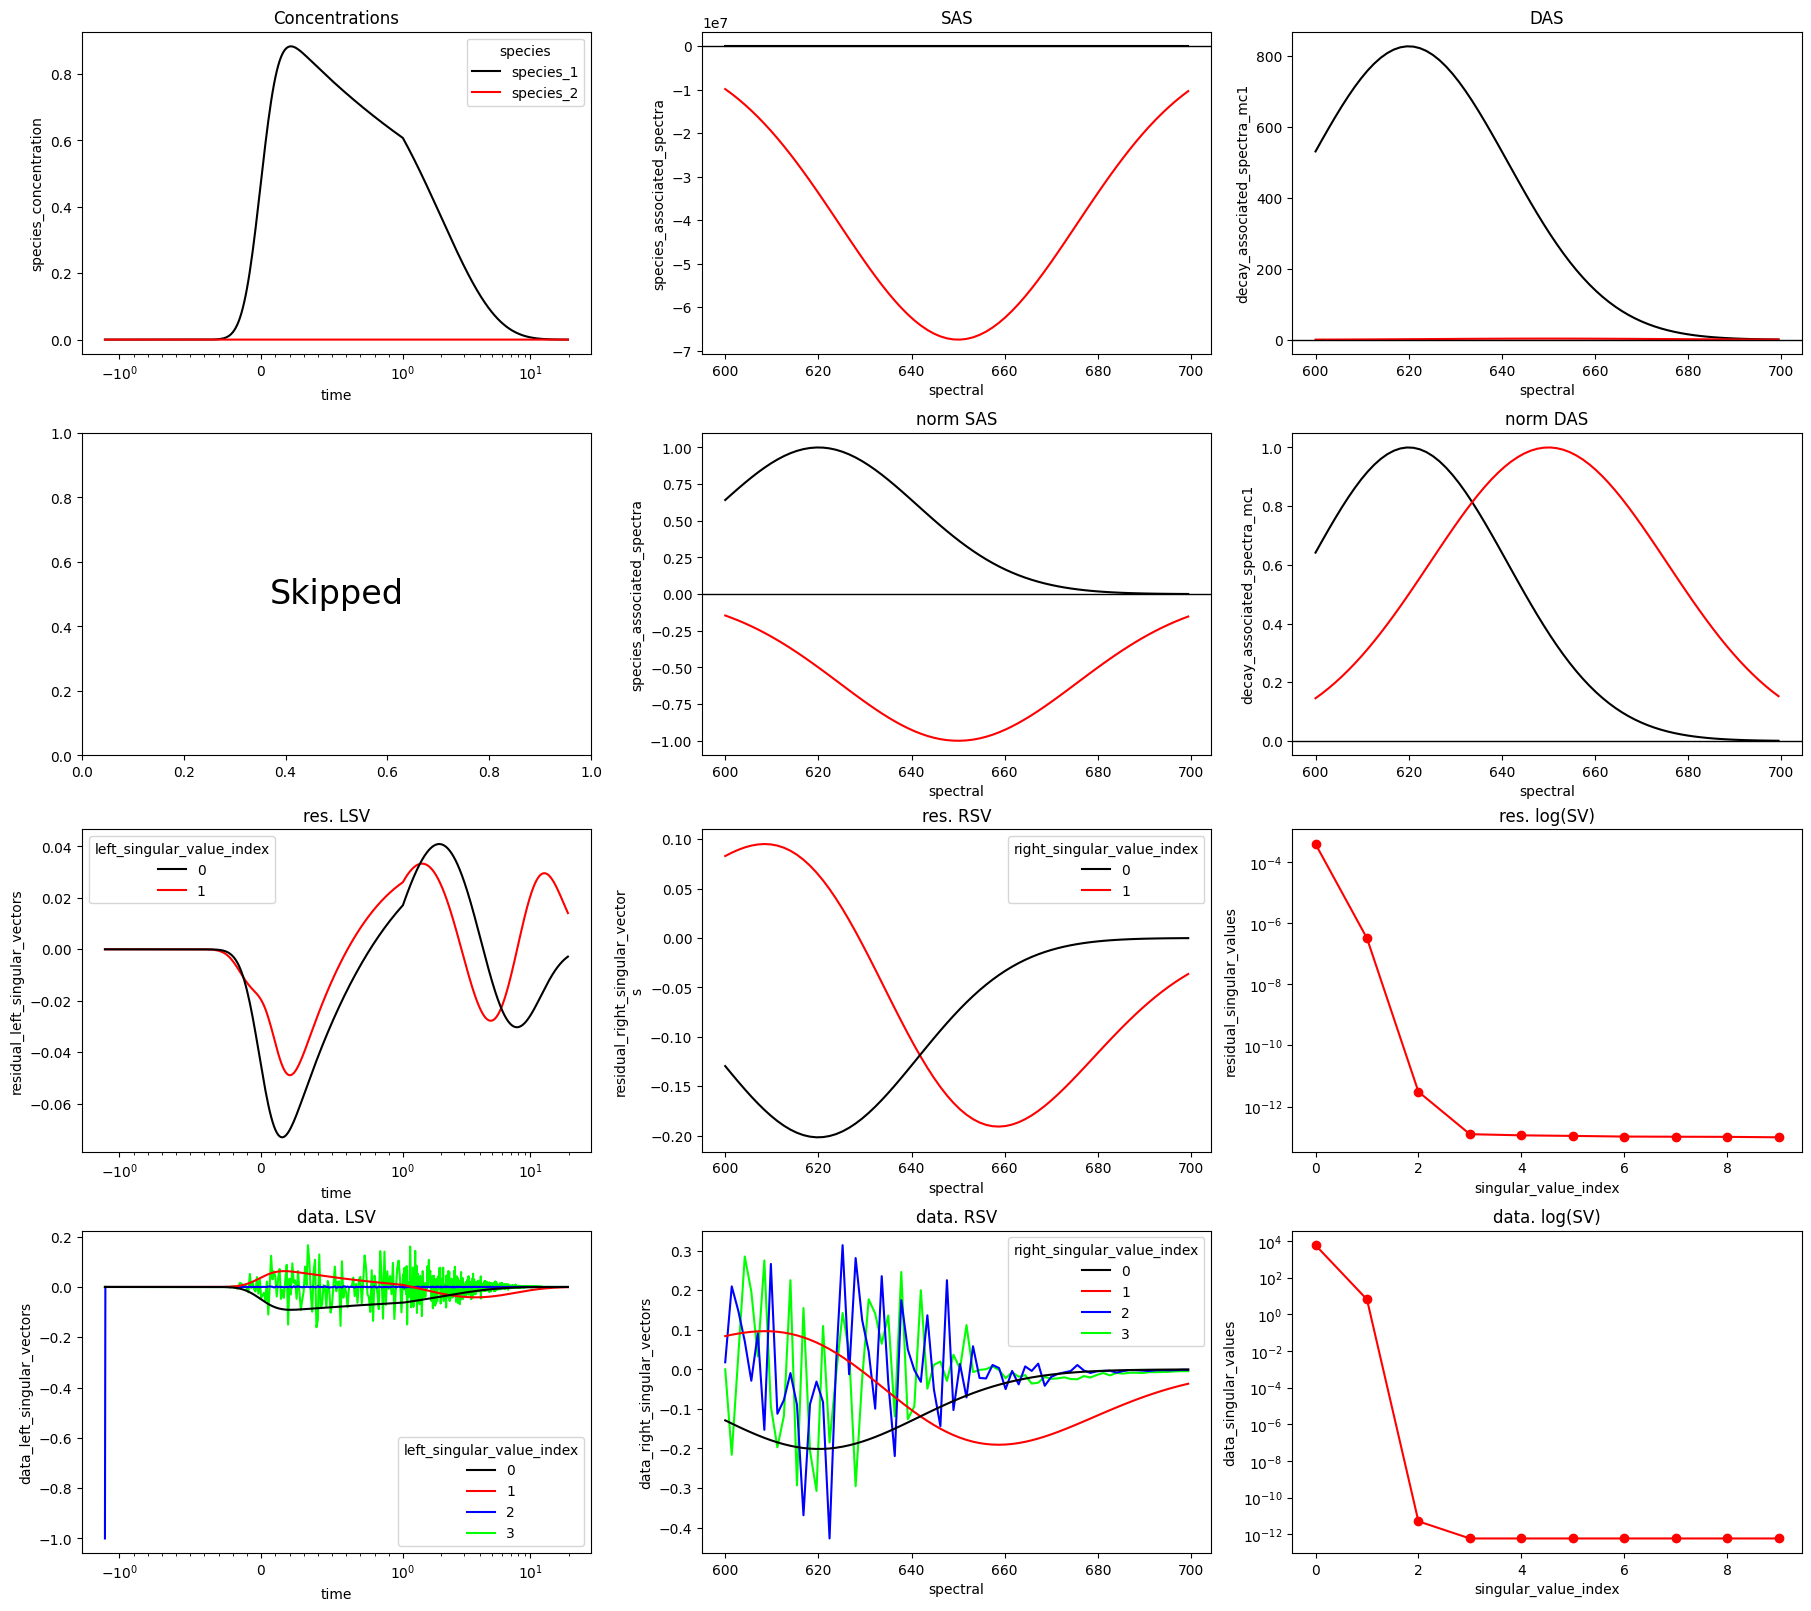

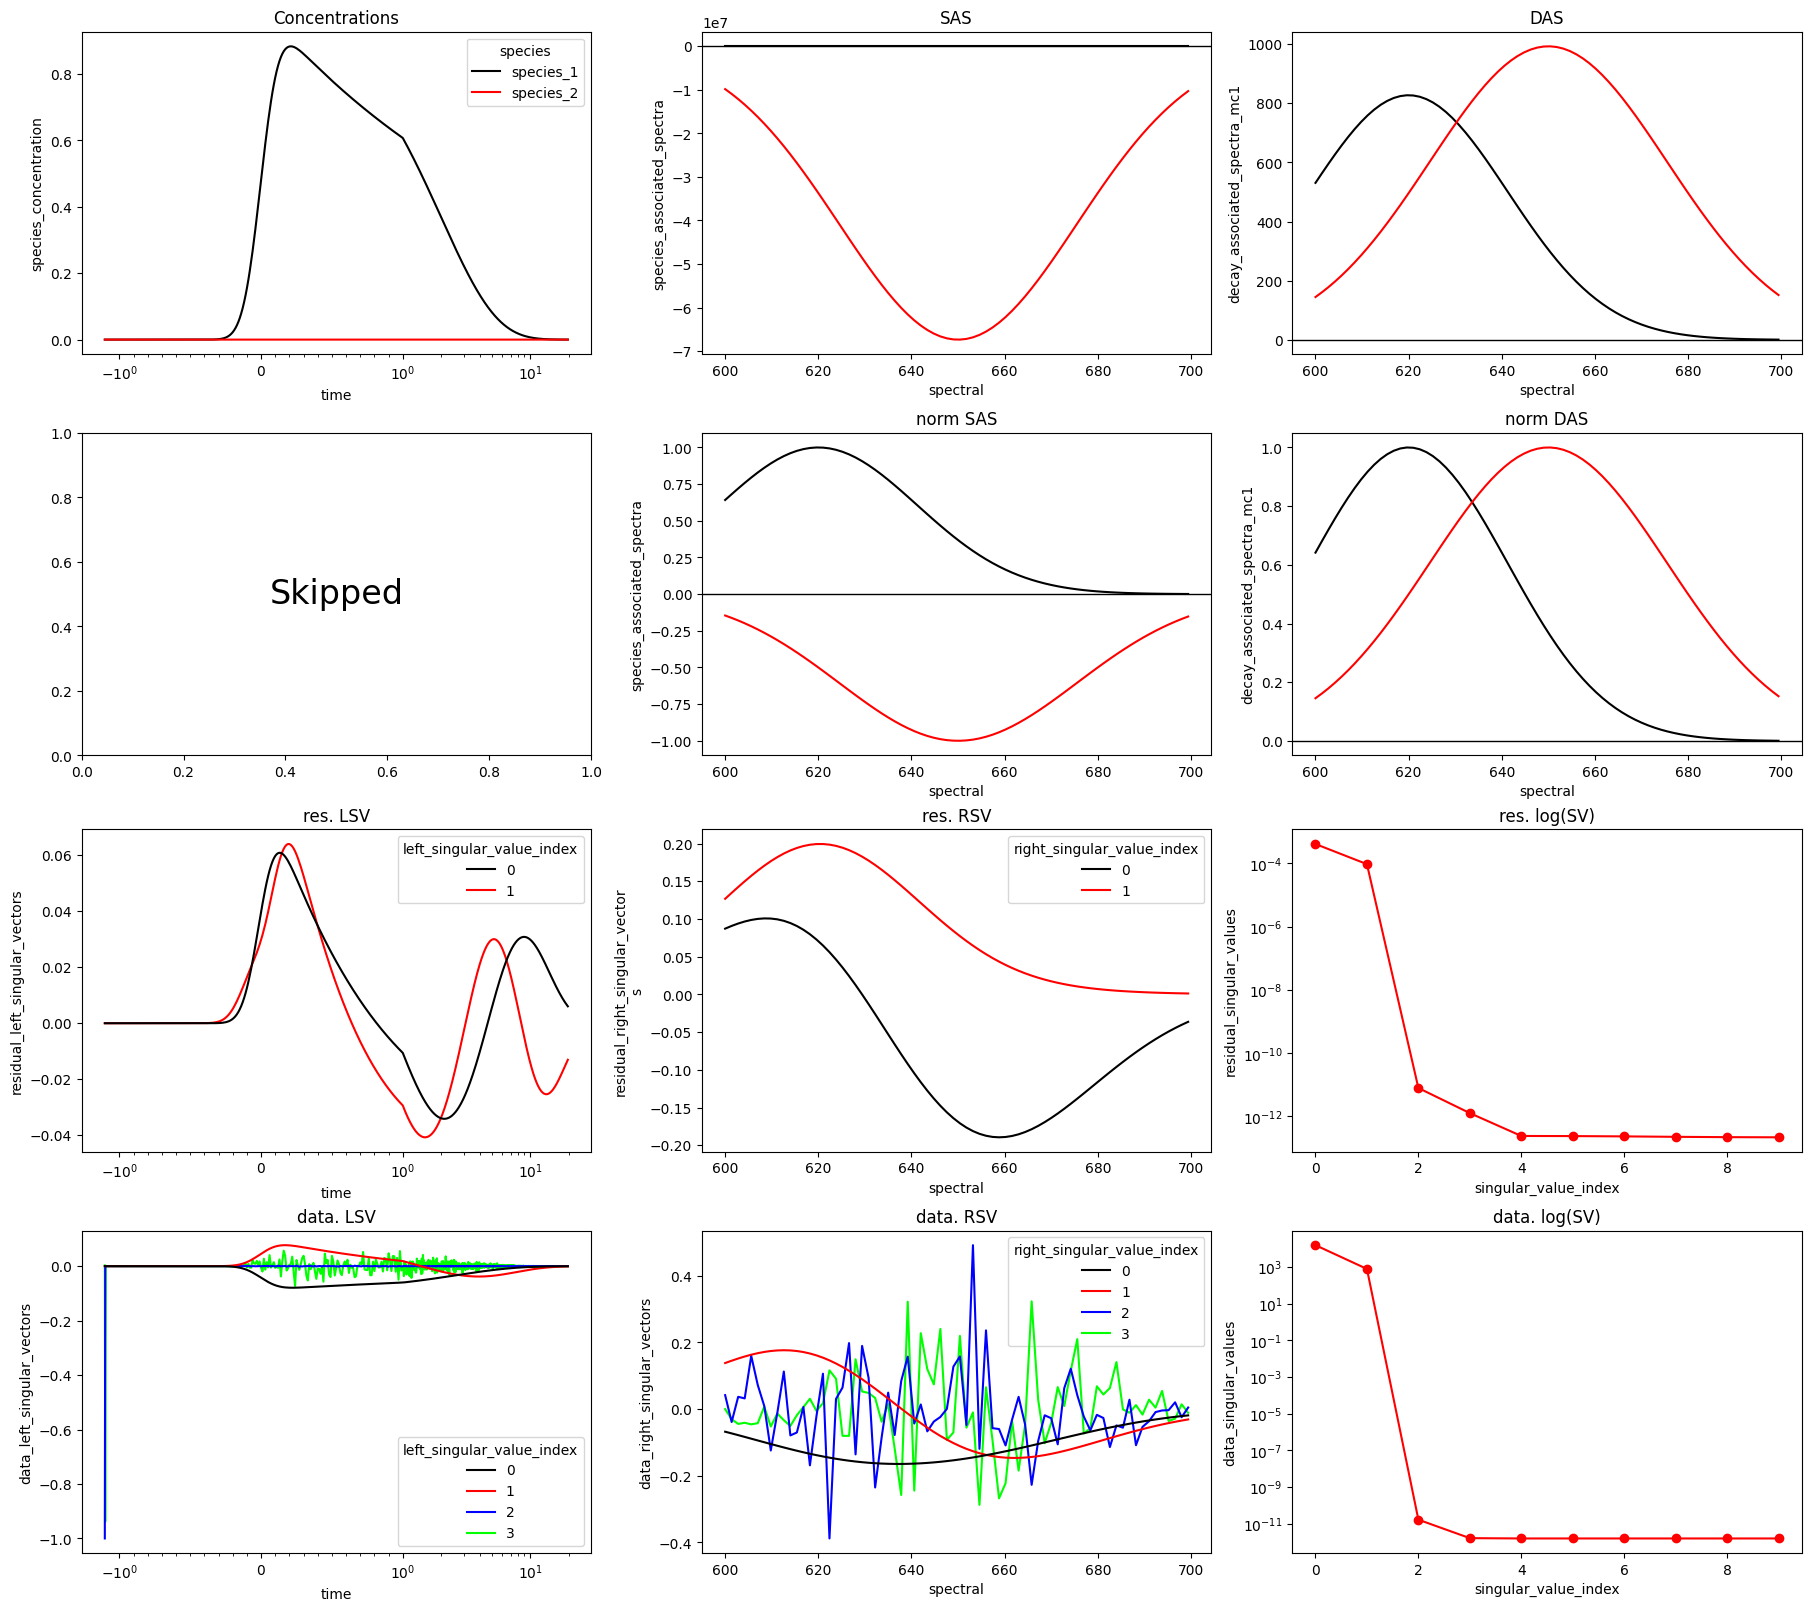

In [17]:
from pyglotaran_extras import plot_overview
from pyglotaran_extras.compat.convert_result_dataset import convert_dataset

plot_overview(convert_dataset(result.data["dataset_1"]), show_data=None)
plot_overview(convert_dataset(result.data["dataset_2"]), show_data=None);

## Fit with link_clp false

In [23]:
fit_scheme_clp_false = load_scheme("models/fit-scheme_link_clp_false.yaml")
fit_scheme_clp_false.load_data({"dataset_1": ds1, "dataset_2": ds2})
result_link_clp_false = fit_scheme_clp_false.optimize(load_parameters("models/fit-params.yaml"))

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.6164e+06                                    3.27e+07    
       1              2         2.7302e+05      2.34e+06       1.56e+00       1.21e+07    
       2              3         1.0164e+04      2.63e+05       3.13e+00       1.23e+06    
       3              4         6.6055e+02      9.50e+03       6.26e+00       1.92e+05    
       4              5         6.8926e-01      6.60e+02       1.25e+01       8.02e+03    
       5              6         6.0848e-07      6.89e-01       4.35e-02       5.36e+00    
       6              7         5.8111e-19      6.08e-07       2.11e-06       5.43e-06    
       7              8         6.0575e-23      5.81e-19       1.60e-07       6.77e-09    
`gtol` termination condition is satisfied.
Function evaluations 8, initial cost 2.6164e+06, final cost 6.0575e-23, first-order optimality 6.77e-09.


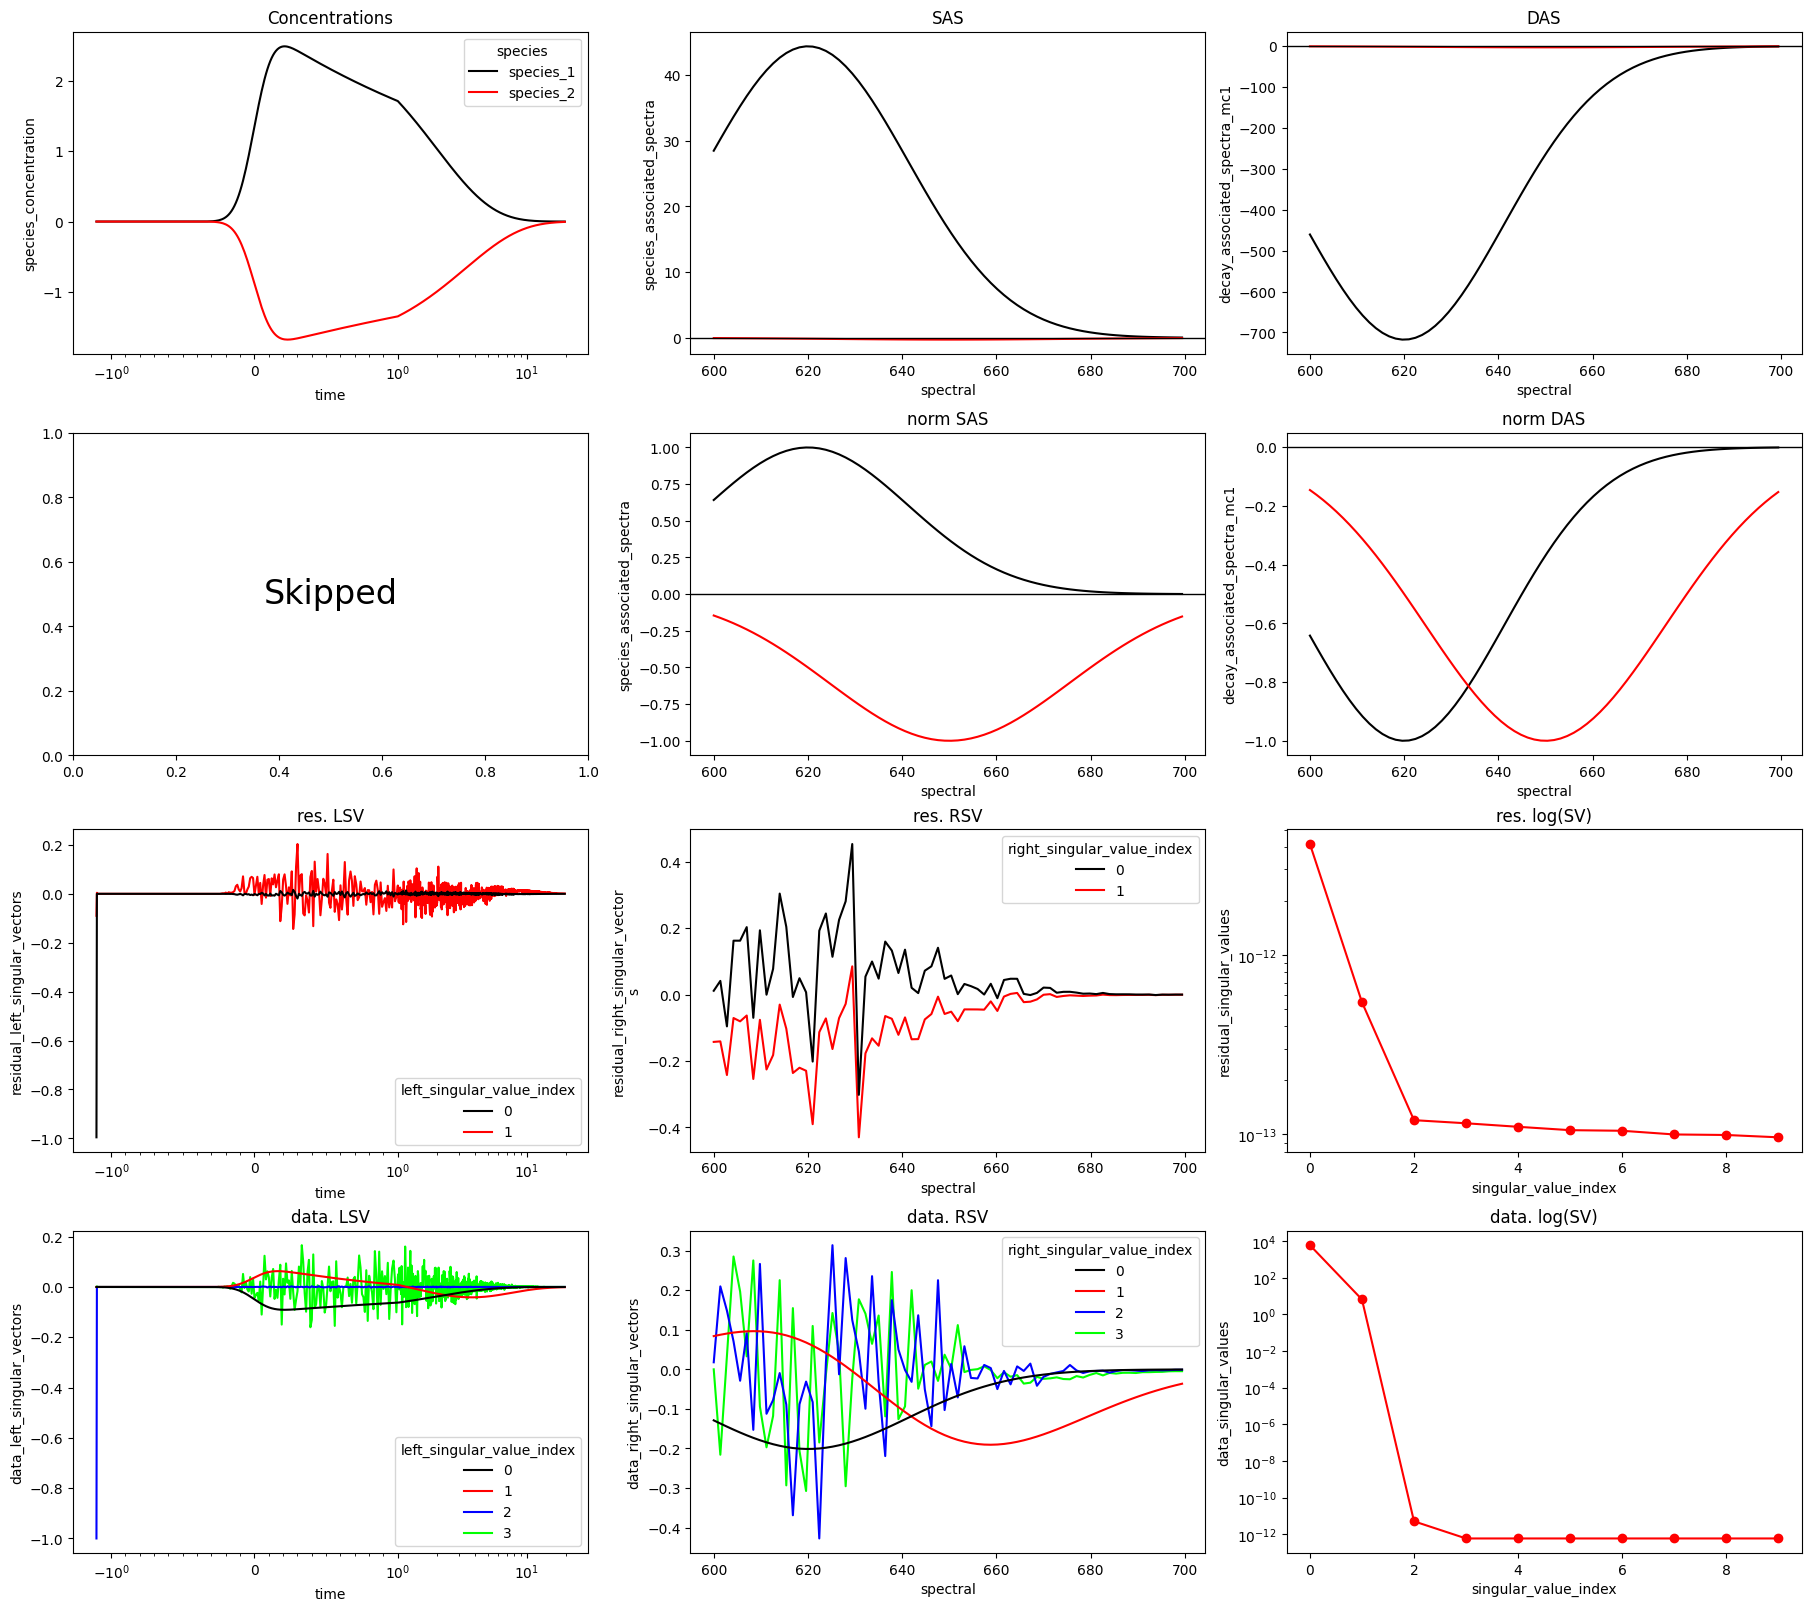

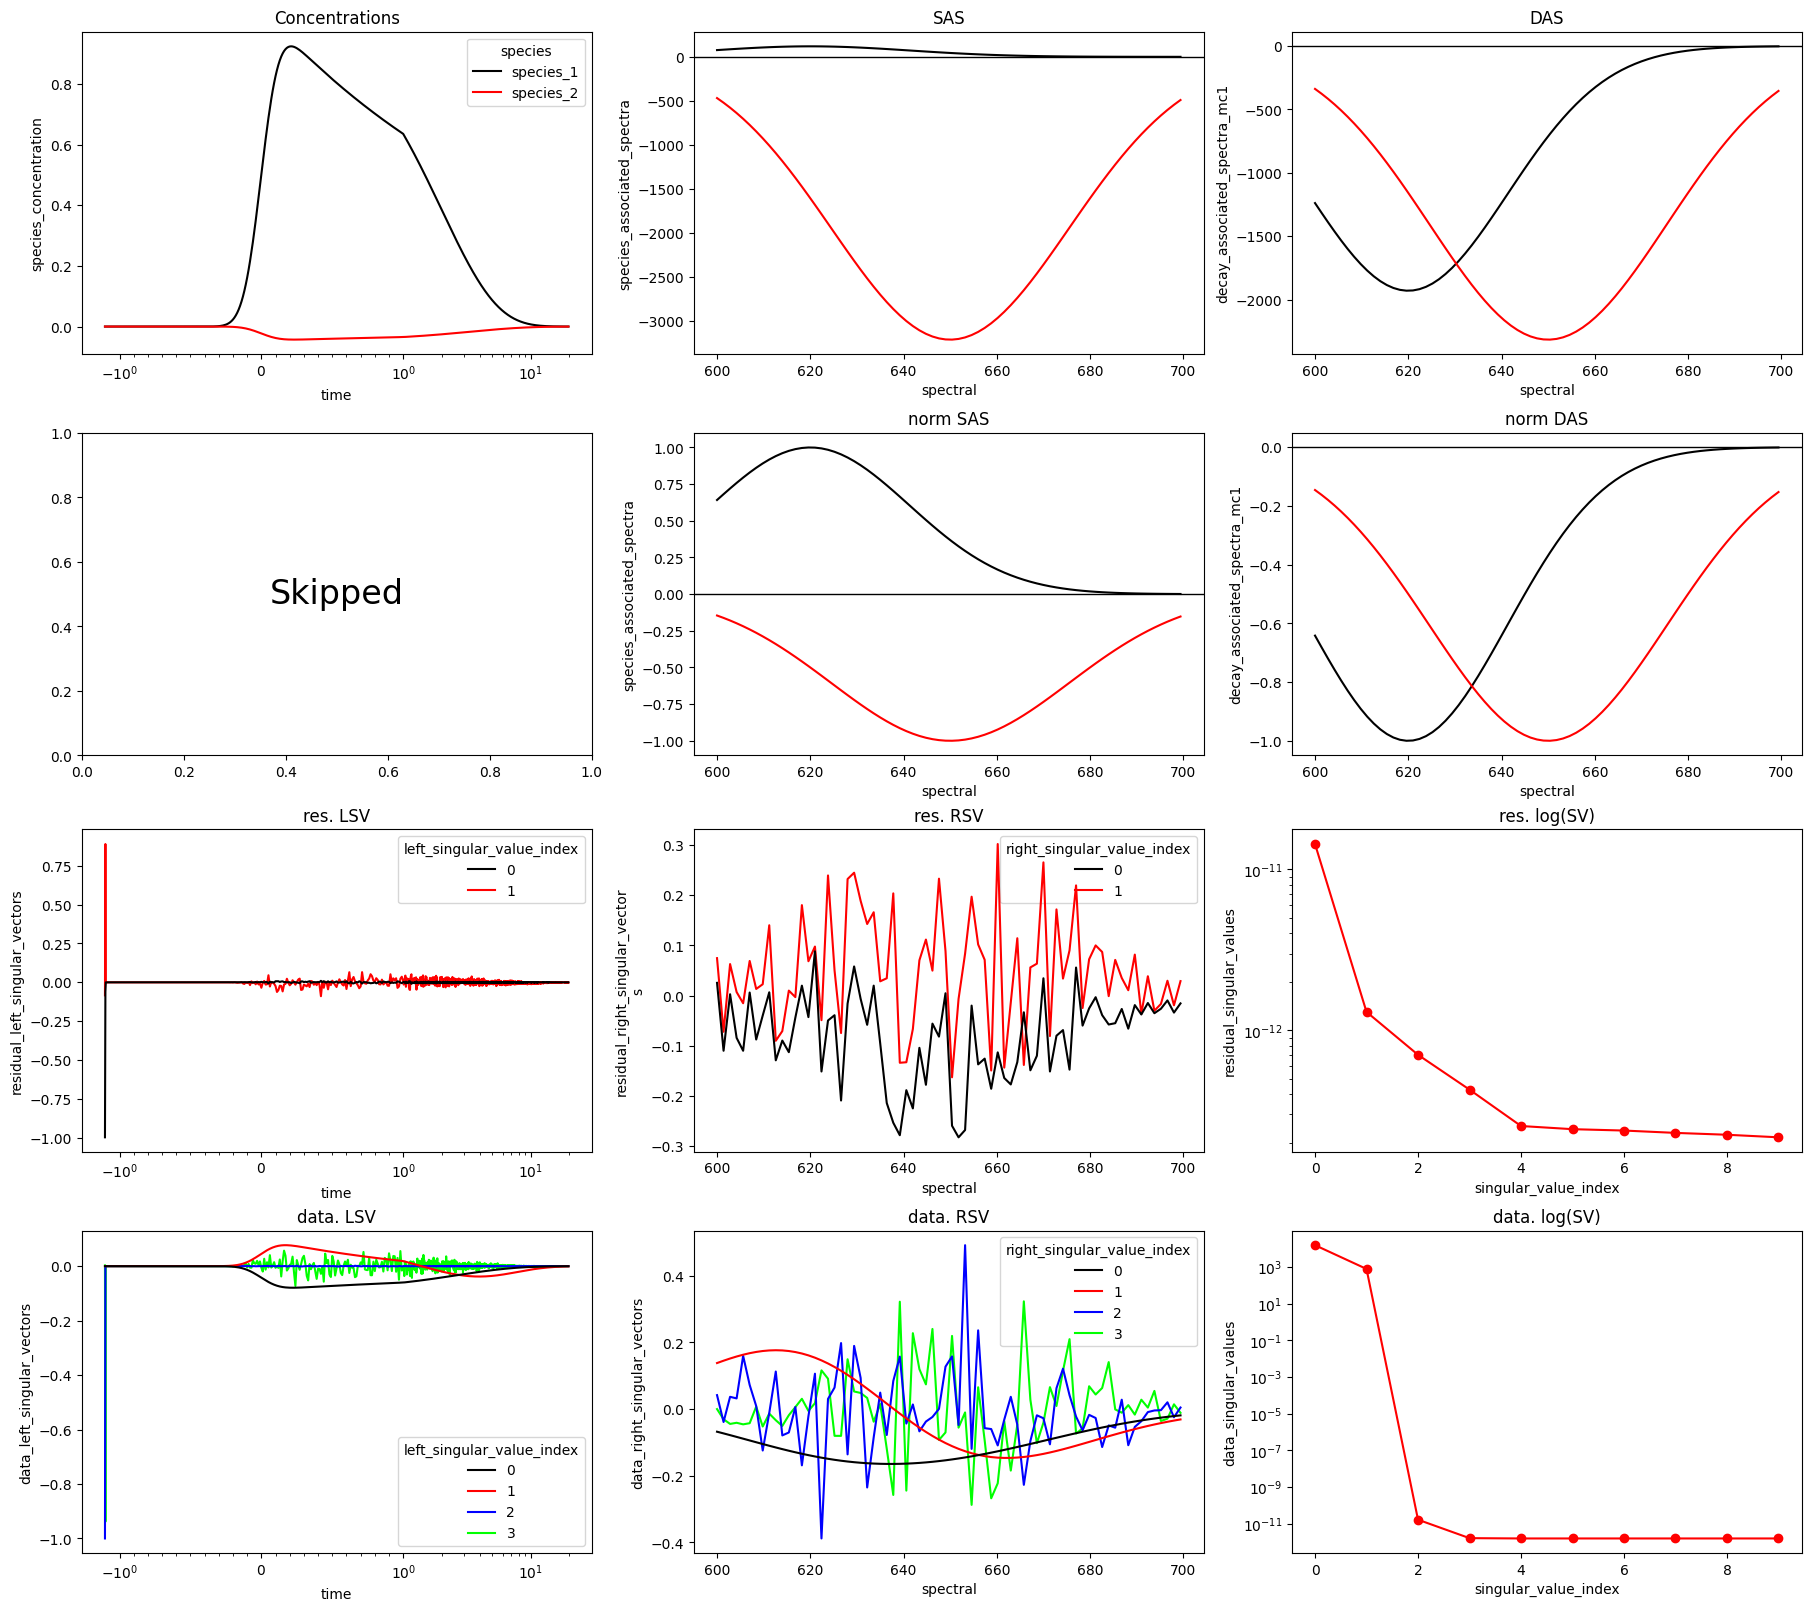

In [24]:
from pyglotaran_extras import plot_overview

plot_overview(convert_dataset(result_link_clp_false.data["dataset_1"]), show_data=None)
plot_overview(convert_dataset(result_link_clp_false.data["dataset_2"]), show_data=None);